# GapMinder Project

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
gapminder = pd.read_excel("Gapminder_key_1.xlsx")

In [30]:
gapminder.head()

,country,year,population,continent
0,Afghanistan,1952,8425333,Asia
1,Afghanistan,1957,9240934,Asia
2,Afghanistan,1962,10267083,Asia
3,Afghanistan,1967,11537966,Asia
4,Afghanistan,1972,13079460,Asia


In [13]:
gapminder2 = pd.read_excel("Gapminder_key_2.xlsx")

In [31]:
gapminder2.head()

,country,year,life_exp,gdp_cap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [105]:
df = pd.merge(gapminder,gapminder2 ,how='inner',on=['country','year'])

In [106]:
df.shape

(1704, 6)

In [107]:
df['life_exp'].std()

12.917107415241187

In [108]:
df['gdp_cap'].mean()

7215.327081212142

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


### Country and Continents are in string data type ,convert them into categorial type of data by using progarmming consrtuct.

In [110]:
df1 = df.astype({"country":'category', "continent":'category'})

In [154]:
gdp_sort['GDP'] = gdp_sort['gdp_cap'] * gdp_sort['population']

In [111]:
gdp_sort = df1.sort_values(by = 'gdp_cap',ascending = False)

In [113]:
gdp_sort.GDP.max()

12934458535084.986

### Total number of country in dataset.

In [43]:
grp_cont = gdp_sort.groupby('country')

In [42]:
len(set(gdp_sort['country']))

142

In [117]:
df2 = df1.drop_duplicates('country')
df2['country'].count()

142

### Which country has lowest life-expectancy in 2007.

In [114]:
Gapminder_2007=df[df['year']==2007]

In [115]:
Gapminder_2007[Gapminder_2007.life_exp==Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


### Which country had the highest GDP per capita in 2007.

In [118]:
Gapminder_2007['GDP']=Gapminder_2007['gdp_cap']*Gapminder_2007['population']

C:\Users\Mohit\AppData\Local\Temp/ipykernel_12148/164237267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gapminder_2007['GDP']=Gapminder_2007['gdp_cap']*Gapminder_2007['population']


In [119]:
Gapminder_2007.head()

,country,year,population,continent,life_exp,gdp_cap,GDP
11,Afghanistan,2007,31889923,Asia,43.828,974.580338,3.107929e+10
23,Albania,2007,3600523,Europe,76.423,5937.029526,2.137641e+10
35,Algeria,2007,33333216,Africa,72.301,6223.367465,2.074449e+11
47,Angola,2007,12420476,Africa,42.731,4797.231267,5.958390e+10
59,Argentina,2007,40301927,Americas,75.320,12779.379640,5.150336e+11


In [120]:
Gapminder_2007[Gapminder_2007.GDP==Gapminder_2007.GDP.max()]

,country,year,population,continent,life_exp,gdp_cap,GDP
1619,United States,2007,301139947,Americas,78.242,42951.65309,1.293446e+13


### Is there any change in the trend from 1952 to 2007 in life expectancy?

In [137]:
import seaborn as sns
from matplotlib import rcParams

<AxesSubplot:xlabel='year', ylabel='life_exp'>

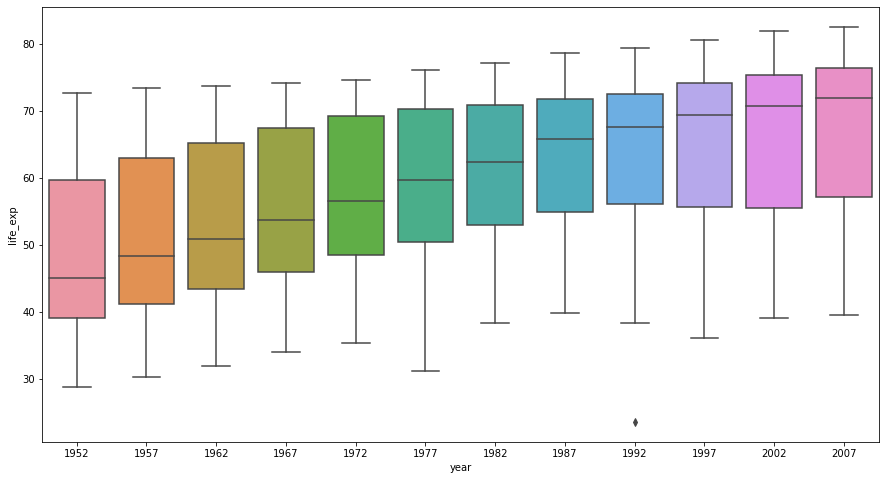

In [143]:
sns.set_style ='whitgrid'
sns.boxplot(y="life_exp", x="year", data=df)

<AxesSubplot:xlabel='year', ylabel='life_exp'>

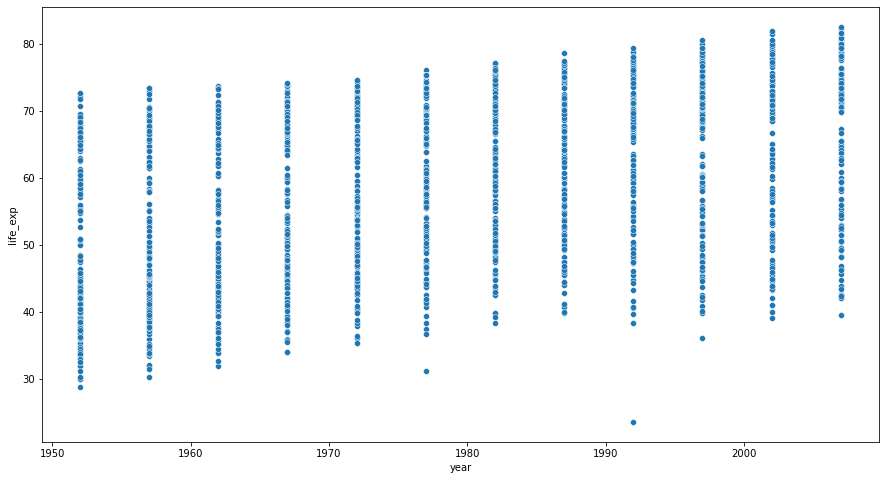

In [140]:
rcParams['figure.figsize'] = 15,8
sns.scatterplot(y="life_exp", x="year", data=df)

### Which continent has lowest life expectancy in 2007?

In [144]:
Gapminder_2007[Gapminder_2007.life_exp==Gapminder_2007.life_exp.min()]

,country,year,population,continent,life_exp,gdp_cap,GDP
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643,5.114071e+09


<BarContainer object of 1704 artists>

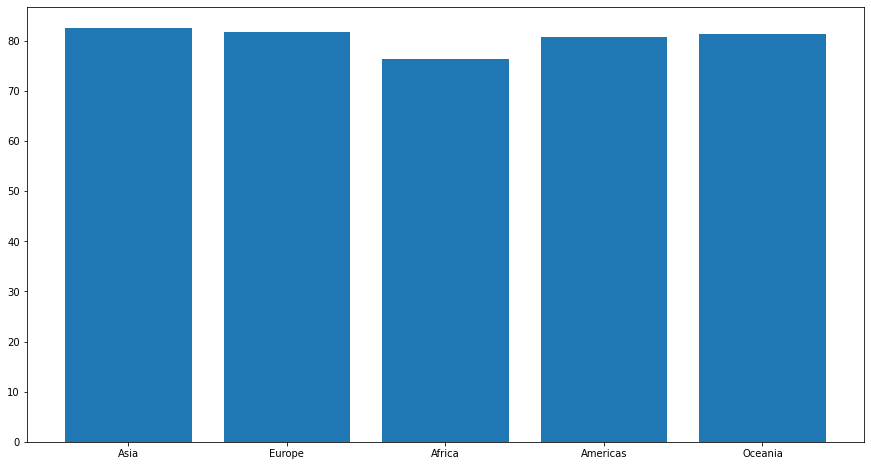

In [148]:
x = df.continent
y = df.life_exp
plt.bar(x,y)

<AxesSubplot:xlabel='continent', ylabel='life_exp'>

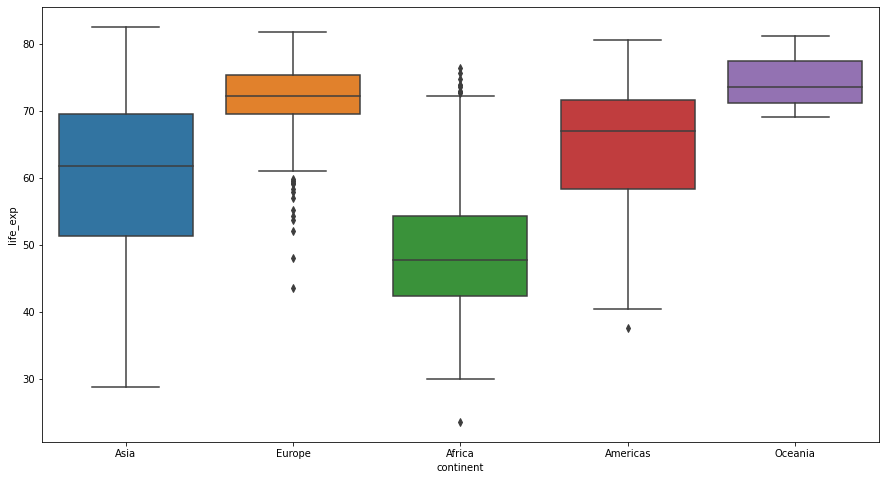

In [149]:
sns.set_style ='whitgrid'
sns.boxplot(y="life_exp", x="continent", data=df)

In [193]:
gdp_sort.describe()

,year,population,life_exp,gdp_cap,GDP
count,1704.00000,1.704000e+03,1704.000000,1704.000000,1.704000e+03
mean,1979.50000,2.960121e+07,59.474439,7215.327081,1.868096e+11
std,17.26533,1.061579e+08,12.917107,9857.454543,7.140297e+11
min,1952.00000,6.001100e+04,23.599000,241.165876,5.278469e+07
25%,1965.75000,2.793664e+06,48.198000,1202.060309,5.895295e+09
50%,1979.50000,7.023596e+06,60.712500,3531.846988,2.234330e+10
75%,1993.25000,1.958522e+07,70.845500,9325.462346,1.057441e+11
max,2007.00000,1.318683e+09,82.603000,113523.132900,1.293446e+13


### Is there an relationship between GDP_capita and life expectancy?

<AxesSubplot:xlabel='gdp_cap', ylabel='life_exp'>

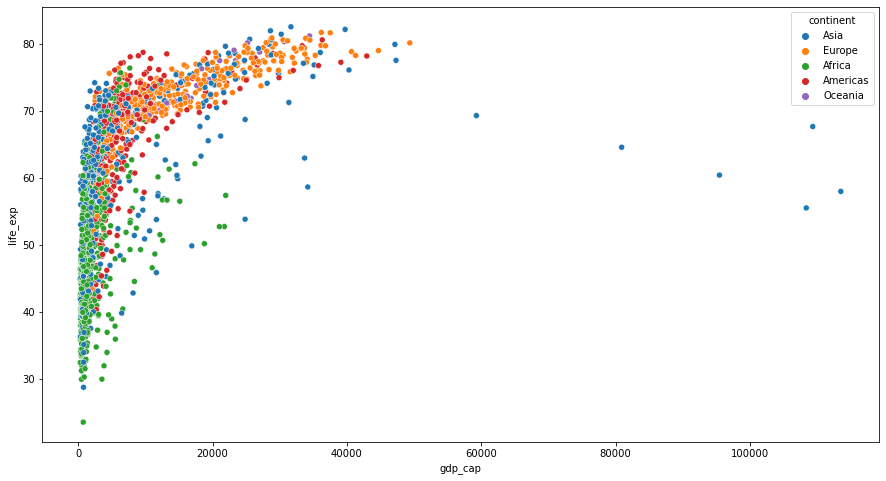

In [169]:
sns.scatterplot( y = 'life_exp',  x ='gdp_cap',  data=df,hue='continent')

from plot it seems that countries have higher life expectancy  have higher GDP per capita.However there is no clear trend or relationship.

### Trend of life expectancy in India from 1950 -2007

In [170]:
Gapminder_India=df[df['country']=='India']

<AxesSubplot:xlabel='year', ylabel='life_exp'>

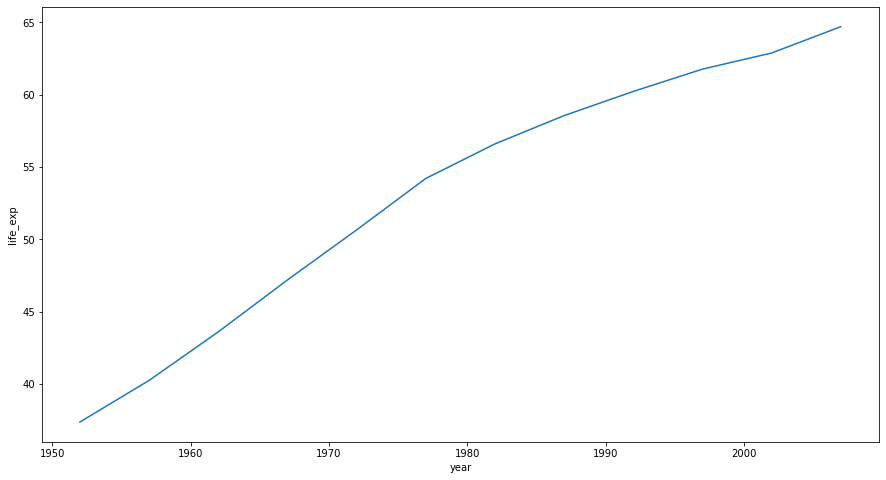

In [176]:
sns.set_style ='whitgrid'
sns.lineplot(y="life_exp", x="year", data=Gapminder_India)

In [ ]:
sns.set_style ='whitgrid'

### Trend of GDP per capita in India from 1950 -2007

<AxesSubplot:xlabel='year', ylabel='gdp_cap'>

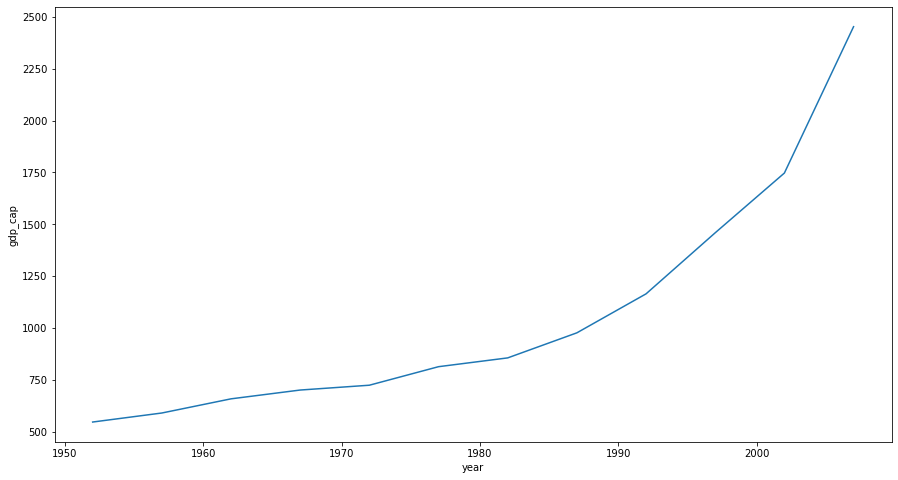

In [179]:
sns.lineplot(y="gdp_cap", x="year", data=Gapminder_India)

### what is median age of each continent by each  year ?

In [190]:
grp_y_a=df.groupby(['year','continent'])['life_exp'].median()
grp_y_a

year  continent
1952  Africa       38.8330
      Americas     54.7450
      Asia         44.8690
      Europe       65.9000
      Oceania      69.2550
1957  Africa       40.5925
      Americas     56.0740
      Asia         48.2840
      Europe       67.6500
      Oceania      70.2950
1962  Africa       42.6305
      Americas     58.2990
      Asia         49.3250
      Europe       69.5250
      Oceania      71.0850
1967  Africa       44.6985
      Americas     60.5230
      Asia         53.6550
      Europe       70.6100
      Oceania      71.3100
1972  Africa       47.0315
      Americas     63.4410
      Asia         56.9500
      Europe       70.8850
      Oceania      71.9100
1977  Africa       49.2725
      Americas     66.3530
      Asia         60.7650
      Europe       72.3350
      Oceania      72.8550
1982  Africa       50.7560
      Americas     67.4050
      Asia         63.7390
      Europe       73.4900
      Oceania      74.2900
1987  Africa       51.6395
      Americ